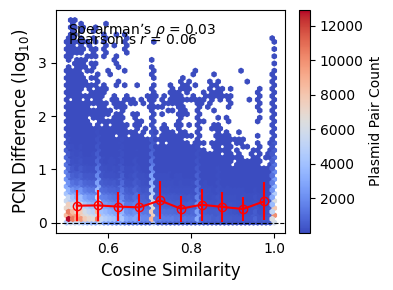

✅ Plot saved to: /mnt/c/Users/Iqra/Desktop/Manuscript/New/Fig3a_Supplementary_hexbin_vectorized.pdf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

# 1) Load the edge list from the specified path in mnt format
edges_fp = "S3_A.csv"
df = pd.read_csv(edges_fp)  

# 2) Compute the PCN ratio: Target PCN as numerator, Source PCN as denominator
df['PCN_Ratio'] = df['Target PCN'] / df['Source PCN']

# 3) Calculate the log10 of the PCN ratio
df['Log10_PCN_Difference'] = np.log10(df['PCN_Ratio'])

# 4) Compute correlation values
spearman_corr, _ = spearmanr(df['Weight'], df['Log10_PCN_Difference'])
pearson_corr, _ = pearsonr(df['Weight'], df['Log10_PCN_Difference'])

# 5) Binning based on cosine similarity (Weight)
num_bins = 10
bins = np.linspace(df['Weight'].min(), df['Weight'].max(), num_bins + 1)
df['Bin'] = np.digitize(df['Weight'], bins)

# 6) Vectorized bin statistics using groupby
binned_centers = (bins[:-1] + bins[1:]) / 2
binned_stats = df.groupby('Bin')['Log10_PCN_Difference'].agg(['mean', 'std'])
binned_stats = binned_stats.loc[binned_stats.index <= num_bins]
binned_means = binned_stats['mean'].values
binned_stds = binned_stats['std'].values
binned_centers = binned_centers[:len(binned_stats)]

# 7) Plotting with hexbin
plt.figure(figsize=(4, 3))
hb = plt.hexbin(
    df['Weight'], df['Log10_PCN_Difference'],
    gridsize=50, cmap='coolwarm', mincnt=1
)
plt.colorbar(hb, label='Plasmid Pair Count')

# 8) Overlay binned means with hollow red markers and error bars
plt.plot(binned_centers, binned_means, color='red', linestyle='-')
plt.errorbar(
    binned_centers, binned_means, yerr=binned_stds,
    fmt='o', mfc='none', mec='red', ecolor='red'
)

# 9) Reference line at y = 0
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# 10) Correlation annotations
plt.text(0.05, 0.95, rf"Spearman’s $\rho$ = {spearman_corr:.2f}", transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')
plt.text(0.05, 0.90, rf"Pearson’s $r$ = {pearson_corr:.2f}", transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

# 11) Axis labels
plt.xlabel('Cosine Similarity', fontsize=12)
plt.ylabel('PCN Difference (log$_{10}$)', fontsize=12)

# 12) Save and show plot
plt.tight_layout()
output_path = 'S3_A.pdf'
plt.savefig(output_path, dpi=1200, format='pdf')
plt.show()

print(f"✅ Plot saved to: {output_path}")
